In [1]:
from fastai.vision.all import *
from pathlib import Path
from matplotlib import cm


import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [2]:
path = '/kaggle/input/jet-images-train-val-test/jet-images_test.hdf5'
classes = ["general", "W-boson"]
    
h5_file = h5py.File(path, 'r')
signal_data = h5_file['signal']
image_data = h5_file['image']

def label_func(x):
    signal = signal_data[int(x)]
    return classes[int(signal)]

def get_items(x):
    l = len(image_data)
    return [str(i) for i in range(l)]

def get_x(x):
    return torch.from_numpy(image_data[int(x)])


In [3]:
train_dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_items,
                   get_x = get_x,
                   get_y     = label_func,
                   splitter  = RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=[Resize(200, method='squish')])

In [4]:
dls_train = train_dblock.dataloaders(path)

In [5]:
xb, yb = dls_train.one_batch()
print(xb.shape)

torch.Size([64, 1, 200, 200])


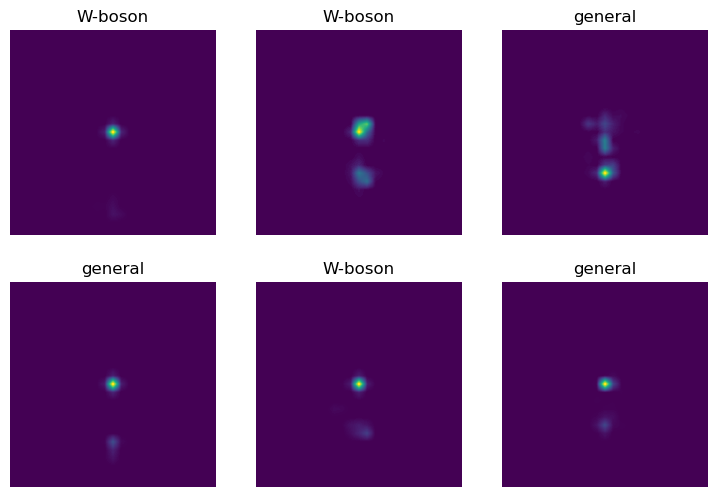

In [6]:
dls_train.show_batch(max_n=6)

In [7]:
learn = vision_learner(dls_train,arch='convnext_tiny',  metrics=accuracy, n_in=1)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_1k_224_ema.pth


In [8]:
xb, yb = dls_train.one_batch()
print(xb.shape)

torch.Size([64, 1, 200, 200])


In [9]:
#lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [10]:
learn.fine_tune(
    10, 
    #lrs.valley 
    cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=3)
)

epoch,train_loss,valid_loss,accuracy,time
0,0.490636,0.461386,0.786971,05:17


epoch,train_loss,valid_loss,accuracy,time
0,0.420311,0.422250,0.805821,16:53
1,0.426046,0.647336,0.724575,16:52
2,0.424690,0.420372,0.809316,16:53
3,0.409297,0.467305,0.779293,16:53


No improvement since epoch 0: early stopping


In [11]:
path = '/kaggle/input/jet-images-train-val-test/jet-images_micro.hdf5'
classes = ["general", "W-boson"]
    
h5_file = h5py.File(path, 'r')
signal_data = h5_file['signal']
image_data = h5_file['image']



def label_func(x):
    signal = signal_data[int(x)]
    return classes[int(signal)]

def get_items(x):
    l = len(image_data)
    return [str(i) for i in range(l)]

def get_x(x):
    return torch.from_numpy(image_data[int(x)])

In [12]:
val_dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_items,
                   get_x = get_x,
                   get_y     = label_func,
                   splitter  = RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=[Resize(200, method='squish')])

In [13]:
dls_val = val_dblock.dataloaders(path)

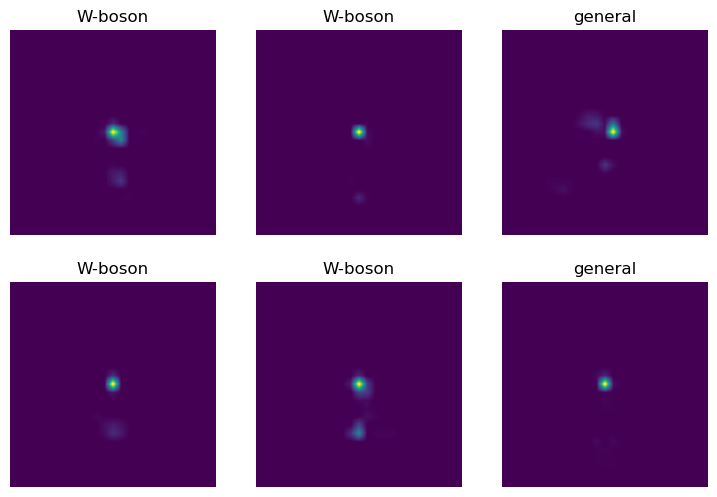

In [14]:
dls_val.show_batch(max_n=6)

In [15]:
learn.dls= dls_val

In [16]:
learn.fine_tune(
    0, cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=3),
)

epoch,train_loss,valid_loss,accuracy,time
0,0.394991,0.457774,0.801719,00:32


In [17]:
xb, yb = dls_val.one_batch()
print(xb.shape)

torch.Size([64, 1, 200, 200])
